<H3>PRI 2022: first project delivery</H3>

**GROUP X**
- name, number
- name, number
- name, number

<H3>Part I: demo of facilities</H3>

In [1]:
from IPython.core.display import HTML

#imports

from mainFunctions.ranking import ranking
from operator import attrgetter
from helper.documentHelper import read_files
from mainFunctions.indexing import indexing
from src.helper.mockDataVisualize import transfer_function_output_ranking
from src.mainFunctions.evaluation import calculate_true_pos, calculate_precision_recall, calculate_fbeta_measure, \
    calculate_precision_recall_tables_and_MAP_param, draw_precision_recall_curve
from src.mainFunctions.visualize import run_visualize

**A) Indexing facilities**

*A.1 Preprocessing options: statistics*

In [2]:
#rare, most common terms


*A.2 Indexing statistics*

In [3]:
#code, statistics and/or charts here
#time, memory

**B) Ranking facilities**

In [4]:
# load files

order_ranked = True
text_processing = True
max_sent = 8
max_chars = 1010
documents = read_files(text_processing, ["business"])

corpus_index = indexing(list(map(attrgetter('text_terms'), documents)))
corpus_idfs: {str: float} = {}

for v in corpus_index:
    corpus_idfs[v] = corpus_index[v].inverted_document_frequency

document = documents[32]

summary_tf = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf", "mmr": False})
summary_tfidf = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": False})
summary_bm25 = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "bm25", "mmr": False})
summary_rrf = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "rrf", "mmr": False})
summary_mmr = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": True})

print(summary_tf)
print("\n")
print(summary_tfidf)

['"Although it is commonly assumed on the basis of anecdotal evidence that disasters result in business failures and bankruptcies on a large scale, our research indicates that most businesses, even those that are especially hard-hit, do indeed recover," the authors concluded.', 'The need to find money to replace lost and damaged property is balanced by the beneficial effect of reconstruction activity; there is rarely, the centre says, any sort of rebuilding boom, but in most cases sizeable indirect losses are avoided.', 'The overwhelming majority of the victims will have had no insurance: according to estimates from India, only one-quarter of those affected there were wealthy enough to afford insurance, and only one-quarter of that group at most will have taken out policies.', 'The MSCI World share index, a measure of global stock market performance, hit its highest level this week since early 2001; the BBC Global 30 has risen by 3% in the past week.', 'A study of the 1993 Des Moines f

*B.1 Summarization solution: results for a given document*

TF Ranking
Precision:  0.5
Recall:  0.2857142857142857
F-beta:  0.4347826086956521
MAP:  0.4303571428571428


/Users/robinhelbig/Dev/Semester 3/RGI/Project/src/mainFunctions/evaluation.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot((r[i],
/Users/robinhelbig/Dev/Semester 3/RGI/Project/src/mainFunctions/evaluation.py:93: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot((r[i], r[i + 1]), (p[i + 1], p[i + 1]), 'k-', label='', color='red')
/Users/robinhelbig/Dev/Semester 3/RGI/Project/src/mainFunctions/evaluation.py:95: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(r, dup_p, 'k--', color='blue')
/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that

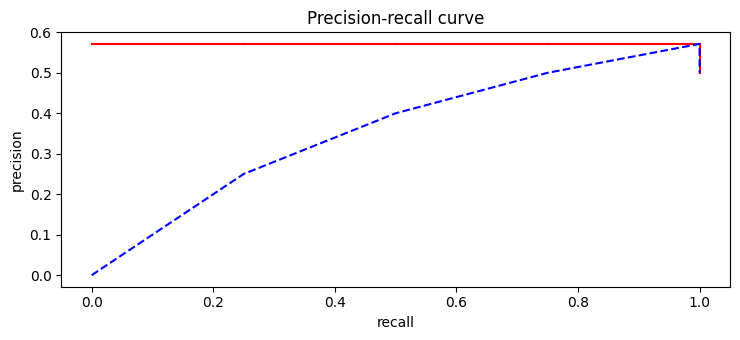

In [5]:
document.summary = summary_tf

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
recall_table, precision_table, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)
precision_recall_tuple = (recall_table, precision_table)

print("TF Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)
draw_precision_recall_curve(precision_recall_tuple)

*B.2 Classic IR models: differences*

In [6]:
document.summary = summary_tfidf

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
_, _, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)

print("TF-IDF Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)

document.summary = summary_bm25

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
_, _, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)

print("\n")
print("BM25 Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)

TF-IDF Ranking
Precision:  0.375
Recall:  0.21428571428571427
F-beta:  0.3260869565217391
MAP:  0.34722222222222215


BM25 Ranking
Precision:  0.375
Recall:  0.21428571428571427
F-beta:  0.3260869565217391
MAP:  0.7000000000000001


*B.3 Reciprocal rank funsion*

In [7]:
document.summary = summary_rrf

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
_, _, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)

print("RRF Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)

RRF Ranking
Precision:  0.5
Recall:  0.2857142857142857
F-beta:  0.4347826086956521
MAP:  0.4583333333333333


*B.4 Maximal Marginal Relevance*

In [8]:
document.summary = summary_mmr

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
_, _, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)

print("MMR Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)

**C) Sentence higlighting facilities**

In [9]:
dict = transfer_function_output_ranking(document.text_sentences, summary_tf)
doc_path = "summaries/summary1"
run_visualize(doc_path, dict, 3)
HTML(filename=doc_path + ".html")

In [10]:
dict = transfer_function_output_ranking(document.text_sentences, summary_tfidf)
doc_path = "summaries/summary2"
run_visualize(doc_path, dict, 3)
HTML(filename=doc_path + ".html")

In [11]:
dict = transfer_function_output_ranking(document.text_sentences, summary_bm25)
doc_path = "summaries/summary3"
run_visualize(doc_path, dict, 3)
HTML(filename=doc_path + ".html")

**D) Evaluation facilities**

*D.1 Evaluation options*

In [12]:
#code, statistics and/or charts here

*D.2 Comparison of settings (IR models, preprocessing)*

In [13]:
#code, statistics and/or charts here

<H3>Part II: questions materials (optional)</H3>

**(a)** Corpus and summary description. Distribution of informative terms before and after text processing.

In [14]:
#code, statistics and/or charts here

**(b)** Summarization performance for the overall and category-conditional corpora.

In [15]:
#code, statistics and/or charts here

**...** (additional questions with empirical results)

<H3>Part III: Other caluclations to support the project</H3>

In [16]:
# get average sentences and characters of the reference summaries
from helper.documentHelper import read_files
totalSentences = 0
totalCharacters = 0
totalDocuments = 0
documents = read_files(False)

for document in documents:
    sentences = document.referenceSummary
    totalSentences += len(sentences)
    totalCharacters += len(" ".join(sentences))
    totalDocuments +=1

print("avg sentences", totalSentences / totalDocuments)
print("avg characters", totalCharacters /totalDocuments)

avg sentences 7.893483146067416
avg characters 1008.9977528089887


<H3>END</H3>